# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
houses = pd.read_csv('../data/boston_data.csv')

In [3]:
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [5]:
houses.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
# There's no nan values

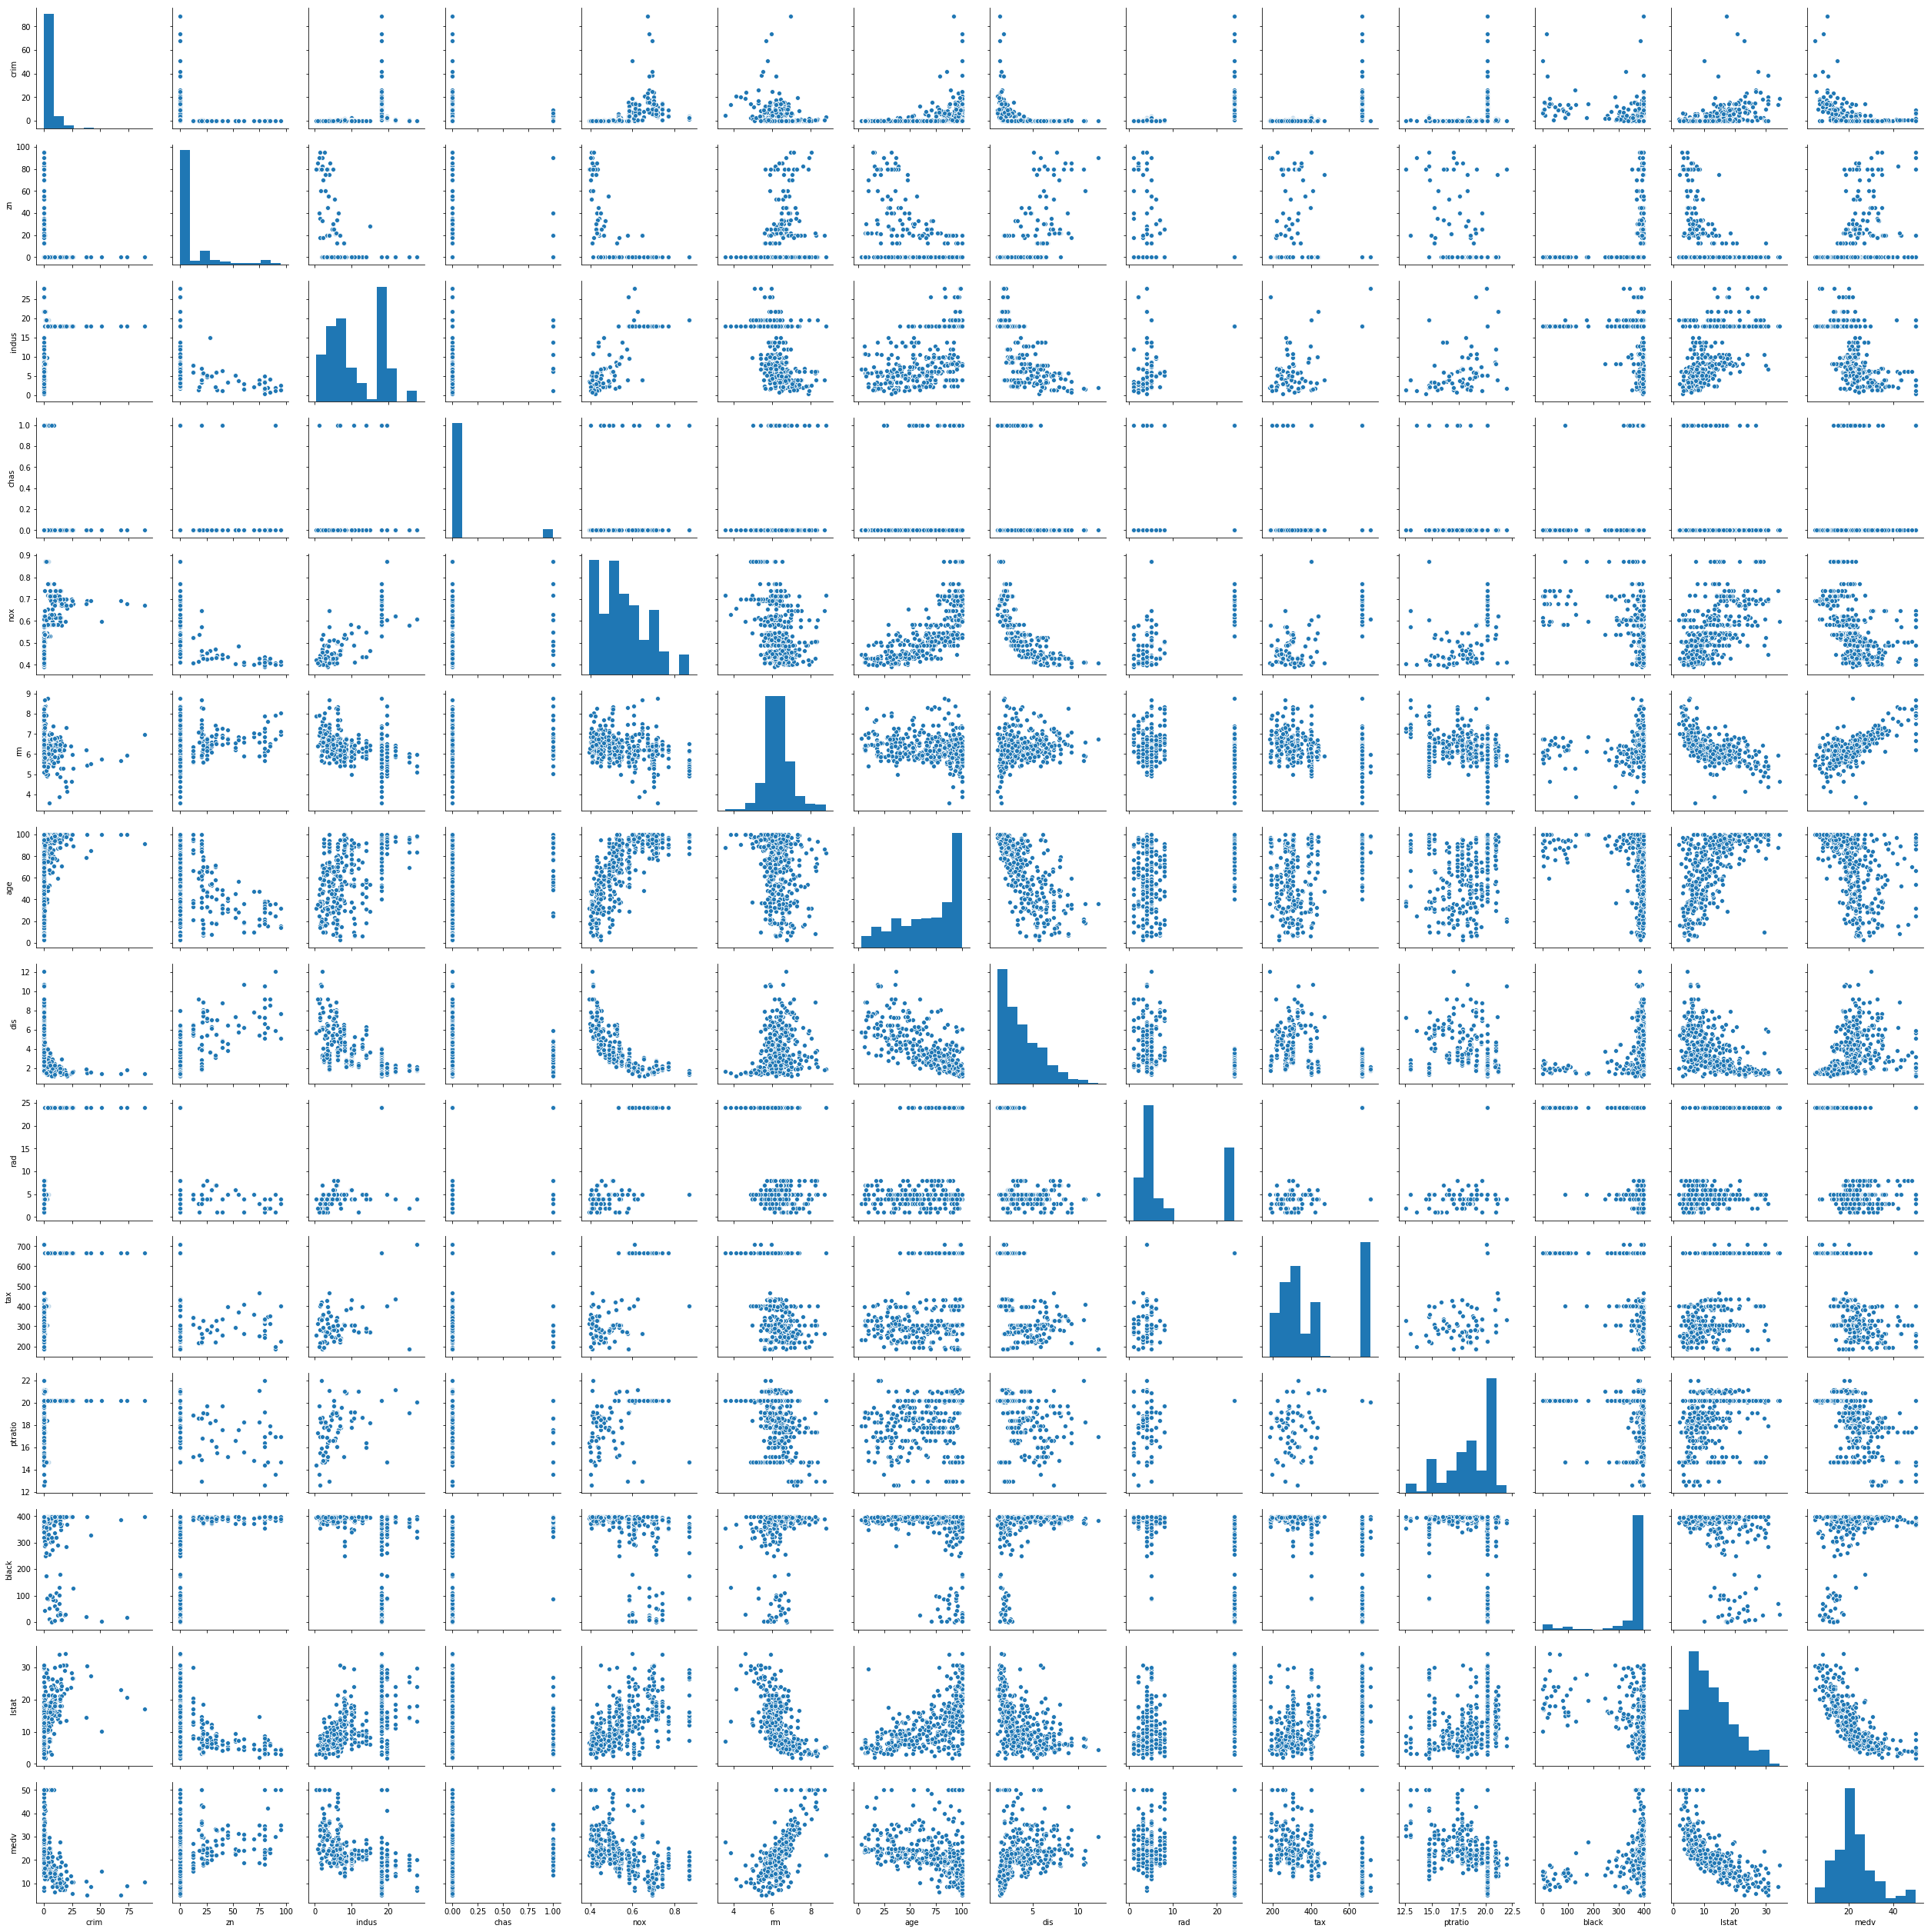

In [7]:
sns.pairplot(houses)

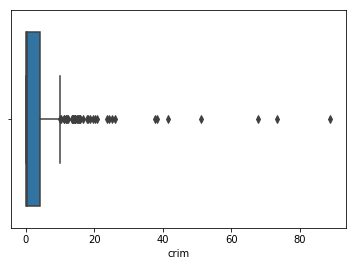

In [8]:
sns.boxplot(houses.crim)

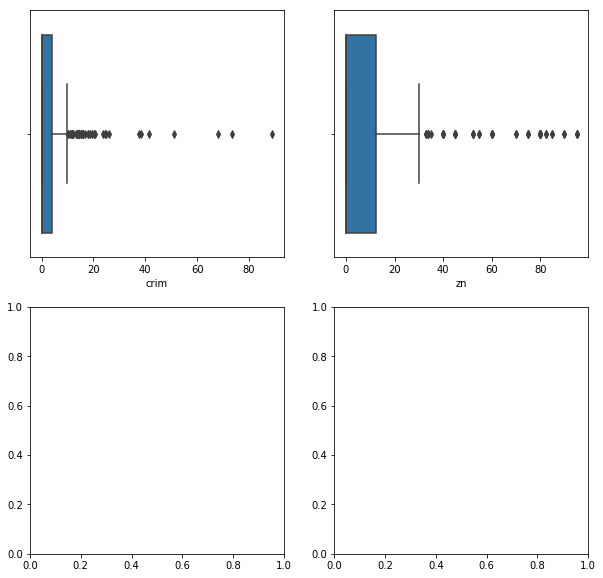

In [9]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(houses.crim, ax=axes[0, 0])
sns.boxplot(houses.zn, ax=axes[0,1])


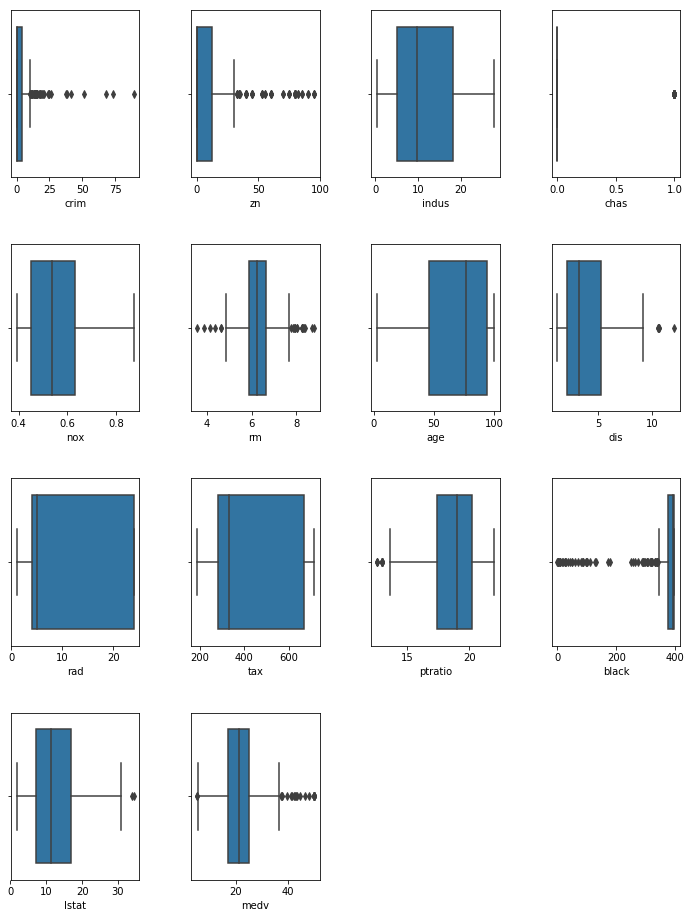

In [10]:
f, ax = plt.subplots(4,4, figsize=(12,16))
f.delaxes(ax[3,2])
f.delaxes(ax[3,3])
plt.subplots_adjust(wspace=0.4,hspace=0.4)
i = 0
for row in ax:
   for col in row:
       if i == 14:
           break
       else:
           sns.boxplot(houses[houses.columns[i]], ax=col)
           i += 1

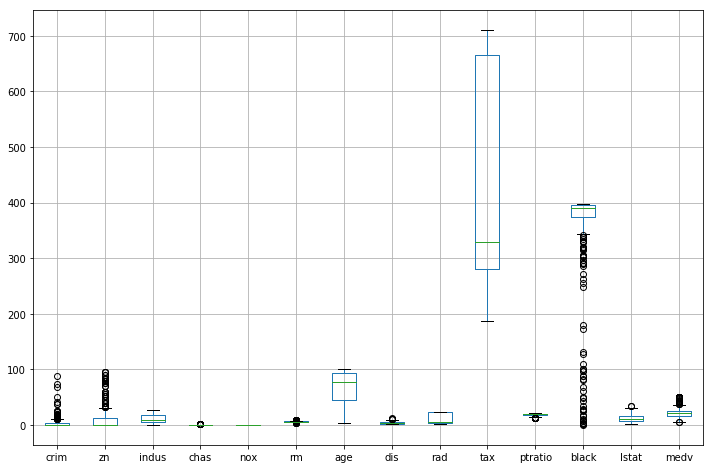

In [11]:
plt.figure(figsize=(12,8))
houses.boxplot(column=list(houses.columns))

/home/atwenter/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


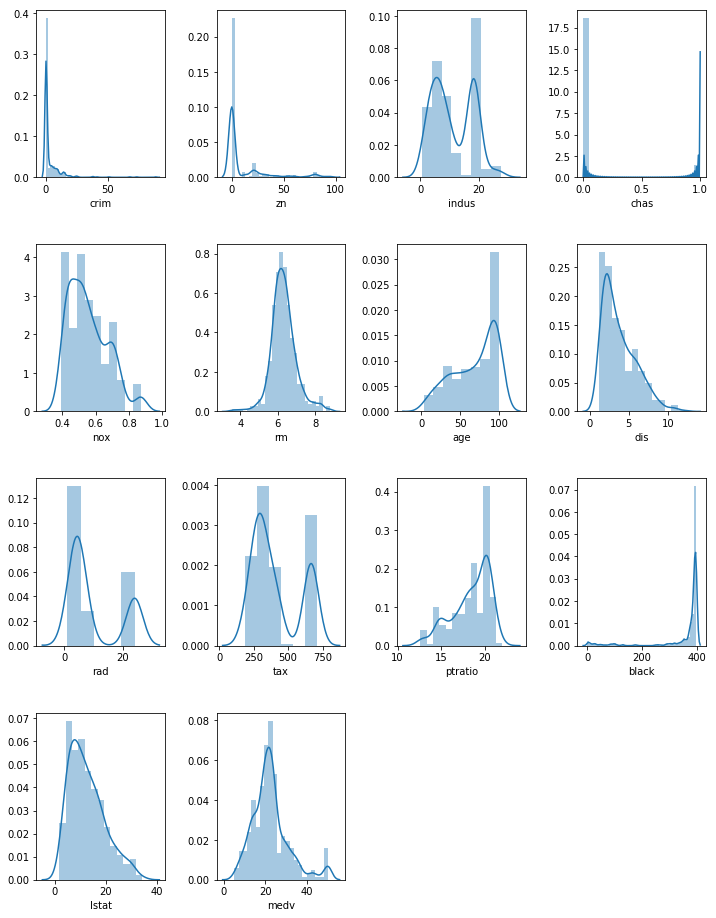

In [12]:
f, ax = plt.subplots(4,4, figsize=(12,16))
f.delaxes(ax[3,2])
f.delaxes(ax[3,3])
plt.subplots_adjust(wspace=0.4,hspace=0.4)
i = 0
for row in ax:
   for col in row:
       if i == 14:
           break
       else:
           sns.distplot(houses[houses.columns[i]], ax=col)
           i += 1

In [13]:
# Remove outliers

In [14]:
houses_RM_out = pd.DataFrame()

for col in houses:
    q1 = houses[col].quantile(0.25)
    q3 = houses[col].quantile(0.75)
    iqr = q3 - q1
    houses_RM_out[col] = houses[col].apply(lambda x: x if (x < q3  + iqr * 3) and (x > q1 - iqr * 3) else np.nan)

In [15]:
houses_RM_out.isna().sum()

crim        18
zn          33
indus        0
chas       404
nox          0
rm           1
age          0
dis          0
rad          0
tax          0
ptratio      0
black       47
lstat        0
medv        12
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

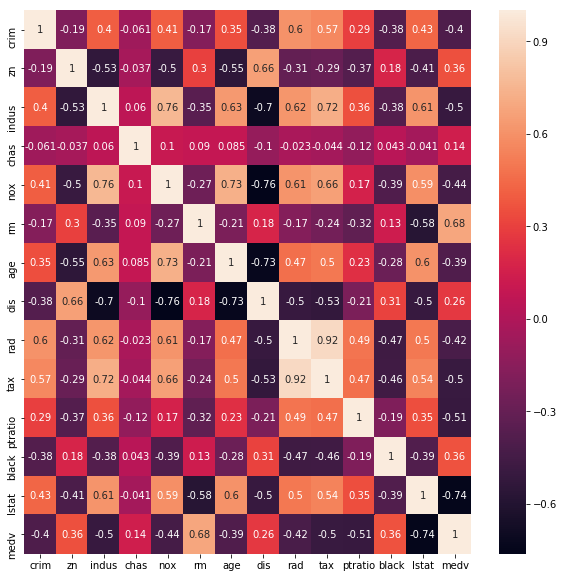

In [16]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(houses.corr(), annot=True, )

/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


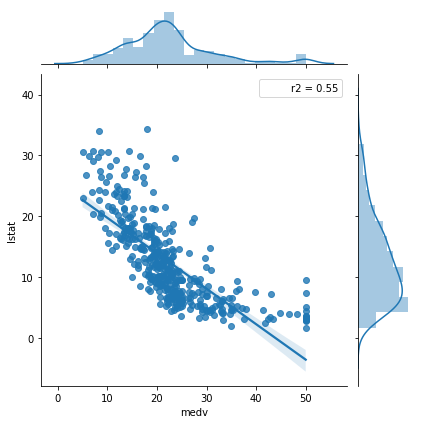

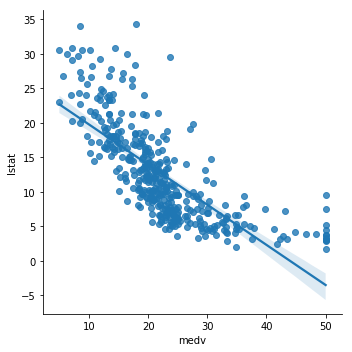

In [17]:
# Your plots here
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(houses['medv'], houses['lstat'], kind="reg", stat_func=r2, truncate= True)
sns.lmplot(x="medv", y="lstat", data=houses, truncate=True, fit_reg= True)

/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


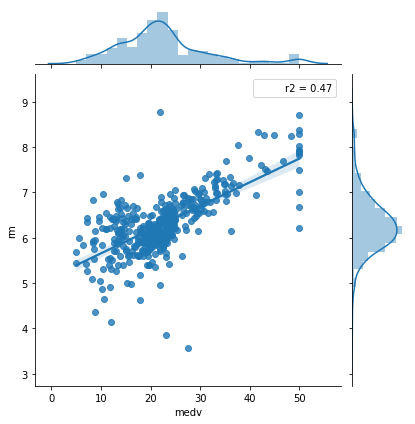

In [18]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(houses['medv'], houses['rm'], kind="reg", stat_func=r2, truncate= True)


/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


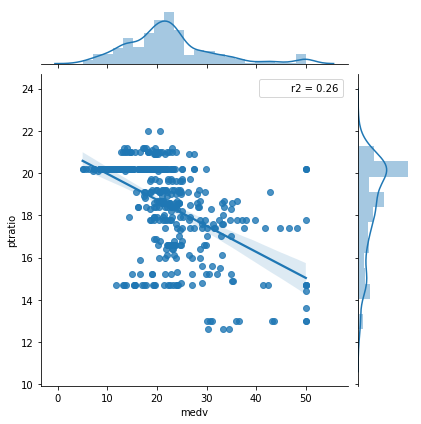

In [19]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(houses['medv'], houses['ptratio'], kind="reg", stat_func=r2, truncate= True)


/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


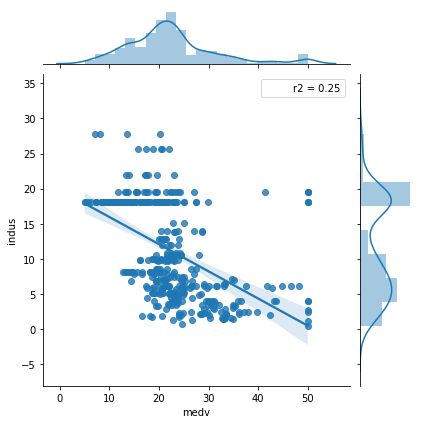

In [20]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(houses['medv'], houses['indus'], kind="reg", stat_func=r2, truncate= True)


/home/atwenter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


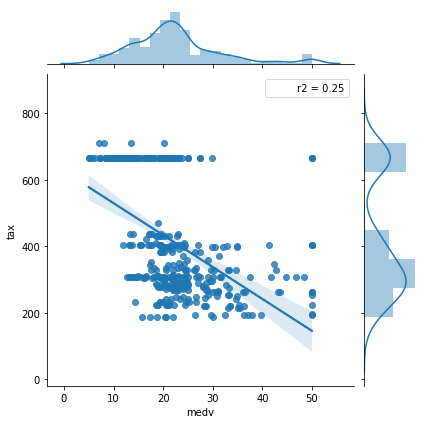

In [21]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(houses['medv'], houses['tax'], kind="reg", stat_func=r2, truncate= True)


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

# Your response here
There are logical relationships:
    As the lower status is reduced, the price is higher
    The more rooms, the higher the price
    The more industry and taxes, the lower the price
    The higher pupil-teacher ratio, the lower the price

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [23]:
houses.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

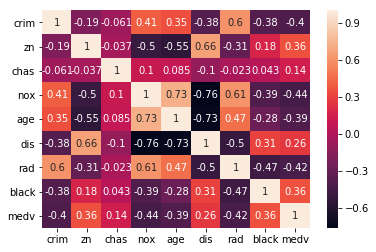

In [24]:
# Your response here
sns.heatmap(houses.drop(columns=['lstat', 'indus', 'rm', 'tax', 'ptratio' ]).corr(), annot=True)

In [ ]:
# No, all of them correlate badly with the price of the houses

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [25]:
# Your code here
houses.describe()['medv']

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [26]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true=y_true, y_pred=y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [27]:
# Your code here
from sklearn.model_selection import train_test_split

X = houses.drop(columns=['medv'])
y= houses.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [28]:
X_train.shape

(323, 13)

In [29]:
y_train.shape

(323,)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Five separate RFR here with the given max depths

max_depth = [2, 4, 6, 8, 10]

score_test = []
score_train = []

for i in max_depth:
    rfr = RandomForestRegressor(max_depth= i)
    rfr.fit(X_train, y_train)
    score_test.append(rfr.score(X_test, y_test))
    score_train.append(rfr.score(X_train, y_train))




/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3

Now, plot the score for each tree on the training set and on the testing set.

In [74]:
# Produce a plot with the score for the testing and training for the different max depths

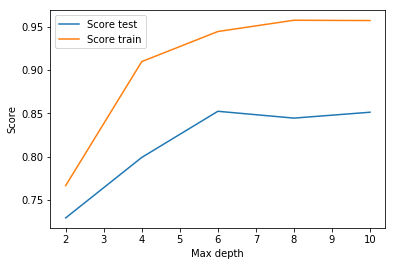

In [75]:
plt.plot( max_depth, score_test)
plt.plot( max_depth, score_train)
plt.legend(['Score test', 'Score train'])
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
It seems that increasing the depth, increase the overfitting, but also the score.  

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
When is trained with depth of 1, suffer from high variance. With higher depth, suffer from high bias. 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
The best max_depth is 6-8, when you take all variables into account. 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here

    How relevant today is data that was collected from 1978? No, prices have increased a lot since the 70s
    Are the features present in the data sufficient to describe a home? No, it lacks the location, that summarize many of these and more data. 
    Is the model robust enough to make consistent predictions? yes
    Would data collected in an urban city like Boston be applicable in a rural city? No, as the variables will differ. 


# Scale variables

In [46]:
from sklearn import preprocessing

In [54]:
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

X_train_sca, X_test_sca, y_train_sca, y_test_sca = train_test_split(X_scaled, y_scaled, test_size= 0.2, random_state= 10)

In [76]:
max_depth = [2, 4, 6, 8, 10]

score_test_sca = []
score_train_sca = []

for i in max_depth:
    rfr = RandomForestRegressor(max_depth= i)
    rfr.fit(X_train_sca, y_train_sca)
    score_test_sca.append(rfr.score(X_test_sca, y_test_sca))
    score_train_sca.append(rfr.score(X_train_sca, y_train_sca))


/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atwenter/anaconda3/lib/python3

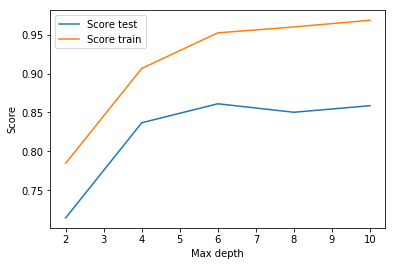

In [77]:
plt.plot( max_depth, score_test_sca)
plt.plot( max_depth, score_train_sca)
plt.legend(['Score test', 'Score train'])
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.show()

The plot from scaled variables is very similar from the one before scaling the variables